In [8]:
import torch
import torch.nn as nn
import numpy as np
import torchvision
import torchvision.transforms as transform
import matplotlib.pyplot as plt

In [17]:
## Hyperparameter Defiinition
input_size = 1
output_size = 1
num_epochs = 100
learning_rate = 0.001

In [18]:
## DATASET

x_train = np.array([[3.3], [4.4], [5.5], [6.71], [6.93], [4.168], 
                    [9.779], [6.182], [7.59], [2.167], [7.042], 
                    [10.791], [5.313], [7.997], [3.1]], dtype=np.float32)

y_train = np.array([[1.7], [2.76], [2.09], [3.19], [1.694], [1.573], 
                    [3.366], [2.596], [2.53], [1.221], [2.827], 
                    [3.465], [1.65], [2.904], [1.3]], dtype=np.float32)



In [19]:
## model definition
model = nn.Linear(input_size, output_size)

In [20]:
## Defining loss criterion and optimization algorithm
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)


In [21]:
# Training the model 
for epoch in range(num_epochs):
    # converting the input numpy arrays to torch tensors
    inputs =torch.from_numpy(x_train)
    targets = torch.from_numpy(y_train)
    
    # forward pass
    outputs = model(inputs)
    loss = criterion(outputs, targets)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if (epoch+1)%5 == 0:
        print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))
        
        

Epoch [5/100], Loss: 33.9477
Epoch [10/100], Loss: 13.9317
Epoch [15/100], Loss: 5.8226
Epoch [20/100], Loss: 2.5373
Epoch [25/100], Loss: 1.2062
Epoch [30/100], Loss: 0.6667
Epoch [35/100], Loss: 0.4480
Epoch [40/100], Loss: 0.3592
Epoch [45/100], Loss: 0.3230
Epoch [50/100], Loss: 0.3081
Epoch [55/100], Loss: 0.3019
Epoch [60/100], Loss: 0.2992
Epoch [65/100], Loss: 0.2979
Epoch [70/100], Loss: 0.2972
Epoch [75/100], Loss: 0.2967
Epoch [80/100], Loss: 0.2963
Epoch [85/100], Loss: 0.2960
Epoch [90/100], Loss: 0.2956
Epoch [95/100], Loss: 0.2953
Epoch [100/100], Loss: 0.2950


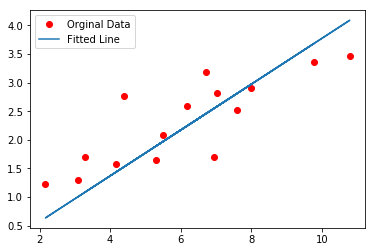

In [25]:
#PLot the graph 
predicted = model(torch.from_numpy(x_train)).detach().numpy()
plt.plot(x_train, y_train, 'ro', label = "Orginal Data")
plt.plot(x_train, predicted, label = 'Fitted Line')
plt.legend()
plt.show()